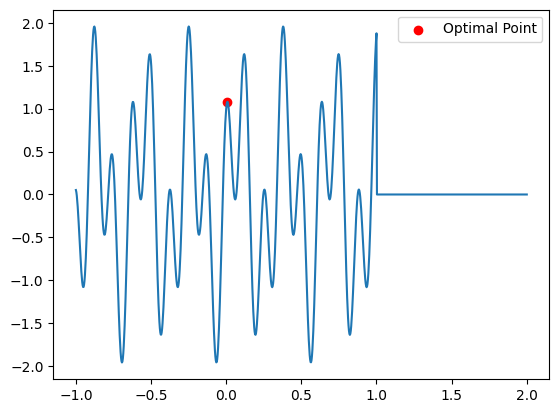

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def h(x):
    y = np.where((x < -1) | (x > 1), 0, np.cos(50 * x) + np.sin(20 * x))
    return y

def hillclimbing(func, start, step_size=0.01, iterations=1000):
    current_point = start
    for _ in range(iterations):
        next_point = current_point + step_size
        if func(next_point) > func(current_point):
            current_point = next_point
    return current_point

x = np.linspace(-1, 2, num=1000)
y = h(x)

plt.plot(x, y)

optimal_point = hillclimbing(h, start=0)
plt.scatter(optimal_point, h(optimal_point), color='red', label='Optimal Point')
plt.legend()

plt.show()

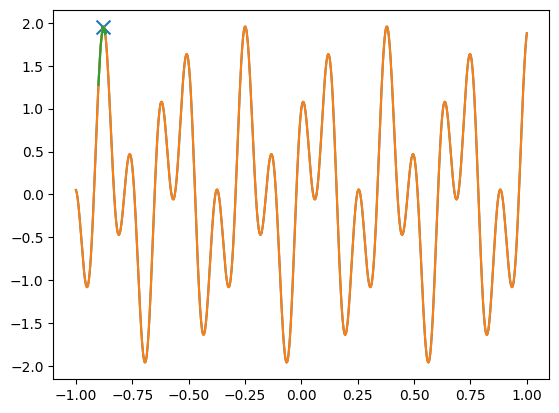

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def h(x):
    if x<-1 or x>1:
        y=0
    else:
        y=(np.cos(50*x)+np.sin(20*x)) #cos, sin in rad
        #y=-x**2
    return y

hv=np.vectorize(h)
X=np.linspace(-1, 1, num=1000) #get 1000 pts from -1 to 2
plt.plot(X, hv(X)) #X is 1000 pts, hv(X) is also 1000 values. [5.20207778e-02,  2.80566244e-02...]

def hillclimbing_search (func, start=0, N=1000):
    x=start
    history=[]
    for i in range (N):
        history.append(x) ## keep track of steps
        u=0.01
        xleft, xright =x-u, x+u  # 0.25-0.001, 0.25+0.001
        yleft, yright = func(xleft), func(xright) #
        if yleft > yright: #If greater find max, if smaller find min
            x=xleft
        else:
            x=xright
    return x, history

#x0, history = hillclimbing_search (hv, start=0.23, N=100)
x0, history = hillclimbing_search (hv, start=np.random.randint(-10,10)/10, N=100)

plt.plot(X, hv(X))
plt.scatter(x0, h(x0), marker ='x', s=100)
plt.plot(history, hv(history))
#history is the x values, hv(history) is the y values